In [1]:
P_B = 0.15 * 0.95 + 0.85 * 0.1
P_AB = 0.15 * 0.95 / P_B
round(P_AB, 2)

0.63

In [2]:
E = 1*0.2 + 2*0.1 + 3*0.6 + 4*0.1
E

2.5999999999999996

In [6]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= , random_state=42)

from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=0).fit(X, y)
#clf.predict -> array

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(random_state=0, criterion=, max_depth=, min_samples_split=, min_samples_leaf=)

from sklearn.metrics import f1_score
#f1_score(y_true, y_pred)

from sklearn.ensemble import BaggingClassifier
#clf = BaggingClassifier(estimator=, n_estimators=, random_state=0)

In [5]:
import pandas as pd
data = pd.read_csv('./wineQualityReds.csv')
data.head()

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1]:
def variance(data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(elem - mean)**2 for elem in data]
    return (sum(deviations) / n)

In [3]:
import numpy as np
data = np.array([4.4, 3.8, 4.8, 4, 3.4, 4.2, 5.2])
data

array([4.4, 3.8, 4.8, 4. , 3.4, 4.2, 5.2])

In [5]:
var = round( variance(data), 3)
var

0.317

## Задание 2.7

In [1]:
import pandas as pd
data = pd.read_csv('./wineQualityReds.csv')
data.head()

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [2]:
data.loc[data.quality >= 6, 'class'] = 1 #good
data.loc[data.quality < 6, 'class'] = 0 #bad

In [11]:
data['class']

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: class, Length: 1599, dtype: object

In [12]:
data['Unnamed: 0']

0          1
1          2
2          3
3          4
4          5
        ... 
1594    1595
1595    1596
1596    1597
1597    1598
1598    1599
Name: Unnamed: 0, Length: 1599, dtype: int64

In [3]:
X = data.drop(labels = ['Unnamed: 0', 'quality', 'class'], axis = 1)
y = data['class']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
data.shape

(1599, 14)

In [17]:
X_train.shape

(1119, 11)

In [19]:
X_test.shape

(480, 11)

In [31]:
X_train

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
925,8.6,0.220,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,12.5,0.460,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,7.2,0.540,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,7.5,0.580,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [5]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [43]:
y_train.unique()

array([1, 0])

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 925 to 1126
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1119 non-null   float64
 1   volatile.acidity      1119 non-null   float64
 2   citric.acid           1119 non-null   float64
 3   residual.sugar        1119 non-null   float64
 4   chlorides             1119 non-null   float64
 5   free.sulfur.dioxide   1119 non-null   float64
 6   total.sulfur.dioxide  1119 non-null   float64
 7   density               1119 non-null   float64
 8   pH                    1119 non-null   float64
 9   sulphates             1119 non-null   float64
 10  alcohol               1119 non-null   float64
dtypes: float64(11)
memory usage: 104.9 KB


In [45]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

#clf.predict -> array
y_pred = clf.predict(X_test)

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7528517110266161

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier(random_state=42, max_depth=10)
clf.fit(X_train, y_train)
#clf.predict -> array
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.7927927927927927

In [13]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
BaggingClassifier()

In [14]:
from sklearn.ensemble import BaggingClassifier
bg_clf = BaggingClassifier(base_estimator = clf, 
                           n_estimators=1500, 
                           random_state=42)

In [16]:
bg_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=42),
                  n_estimators=1500, random_state=42)

In [17]:
y_pred = bg_clf.predict(X_test)

In [18]:
f1_score(y_test, y_pred)

0.8181818181818181

## Задание 3.4

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

boston_data = pd.read_csv('./boston.csv')
X = boston_data.drop(labels=['target'], axis=1)
y = boston_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [19]:
boston_data = pd.read_csv('./boston.csv')
boston_data.head()

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,"0,00632",18,"2,31",0,"0,538","6,575","65,2","4,09",1,296,"15,3","4,98",24
1,"0,02731",0,"7,07",0,"0,469","6,421","78,9","4,9671",2,242,"17,8","9,14","21,6"
2,"0,02729",0,"7,07",0,"0,469","7,185","61,1","4,9671",2,242,"17,8","4,03","34,7"
3,"0,03237",0,"2,18",0,"0,458","6,998","45,8","6,0622",3,222,"18,7","2,94","33,4"
4,"0,06905",0,"2,18",0,"0,458","7,147","54,2","6,0622",3,222,"18,7","5,33","36,2"


In [32]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   crim_rate       506 non-null    object
 1   zn              506 non-null    object
 2   business        506 non-null    object
 3   river           506 non-null    int64 
 4   nit_oxiden      506 non-null    object
 5   rooms           506 non-null    object
 6   age             506 non-null    object
 7   dist            506 non-null    object
 8   highways_index  506 non-null    int64 
 9   tax             506 non-null    int64 
 10  pup_per_teaс    506 non-null    object
 11  lower           506 non-null    object
 12  target          506 non-null    object
dtypes: int64(3), object(10)
memory usage: 51.5+ KB


In [40]:
boston = boston_data[['crim_rate', 'zn', 'business', 'nit_oxiden', 'rooms', 'age',
       'dist', 'pup_per_teaс', 'lower', 'target']].apply(lambda x: x.str.replace(',', '.'))

In [41]:
boston.head()

,crim_rate,zn,business,nit_oxiden,rooms,age,dist,pup_per_teaс,lower,target
0,0.00632,18,2.31,0.538,6.575,65.2,4.09,15.3,4.98,24
1,0.02731,0,7.07,0.469,6.421,78.9,4.9671,17.8,9.14,21.6
2,0.02729,0,7.07,0.469,7.185,61.1,4.9671,17.8,4.03,34.7
3,0.03237,0,2.18,0.458,6.998,45.8,6.0622,18.7,2.94,33.4
4,0.06905,0,2.18,0.458,7.147,54.2,6.0622,18.7,5.33,36.2


In [33]:
boston_data.columns

Index(['crim_rate', 'zn', 'business', 'river', 'nit_oxiden', 'rooms', 'age',
       'dist', 'highways_index', 'tax', 'pup_per_teaс', 'lower', 'target'],
      dtype='object')

In [42]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   crim_rate     506 non-null    object
 1   zn            506 non-null    object
 2   business      506 non-null    object
 3   nit_oxiden    506 non-null    object
 4   rooms         506 non-null    object
 5   age           506 non-null    object
 6   dist          506 non-null    object
 7   pup_per_teaс  506 non-null    object
 8   lower         506 non-null    object
 9   target        506 non-null    object
dtypes: object(10)
memory usage: 39.7+ KB


In [46]:
# boston.apply(lambda x: x.astype(float))
boston = boston.astype(float)
boston

,crim_rate,zn,business,nit_oxiden,rooms,age,dist,pup_per_teaс,lower,target
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,21.0,6.48,22.0


In [47]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crim_rate     506 non-null    float64
 1   zn            506 non-null    float64
 2   business      506 non-null    float64
 3   nit_oxiden    506 non-null    float64
 4   rooms         506 non-null    float64
 5   age           506 non-null    float64
 6   dist          506 non-null    float64
 7   pup_per_teaс  506 non-null    float64
 8   lower         506 non-null    float64
 9   target        506 non-null    float64
dtypes: float64(10)
memory usage: 39.7 KB


In [48]:
boston['river'] = boston_data['river']
boston['highways_index'] = boston_data['highways_index']
boston['tax'] = boston_data['tax']

In [55]:
X = boston.drop(labels=['target'], axis=1)
y = boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mean_absolute_error(y_test, y_pred)

3.7222793958561473

In [59]:
import numpy as np
median = np.mean(y_train)
median

22.77316384180791

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

boston_data = pd.read_csv('./boston.csv')

boston = boston_data[['crim_rate', 'zn', 'business', 'nit_oxiden', 'rooms', 'age',
       'dist', 'pup_per_teaс', 'lower', 'target']].apply(lambda x: x.str.replace(',', '.'))

boston = boston.astype(float)
boston['river'] = boston_data['river']
boston['highways_index'] = boston_data['highways_index']
boston['tax'] = boston_data['tax']

X = boston.drop(labels=['target'], axis=1)
y = boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

rg_3 = RandomForestRegressor(random_state=13, n_estimators=3)
rg_10 = RandomForestRegressor(random_state=13, n_estimators=10)
rg_100 = RandomForestRegressor(random_state=13, n_estimators=100)
rg_500 = RandomForestRegressor(random_state=13, n_estimators=500)

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
rg_3.fit(X_train, y_train)
rg_10.fit(X_train, y_train)
rg_100.fit(X_train, y_train)
rg_500.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=13)

In [4]:
from sklearn.metrics import mean_absolute_error
y_pred = rg_3.predict(X_test)
mae_3 = mean_absolute_error(y_test, y_pred)

In [6]:
y_pred = rg_10.predict(X_test)
mae_10 = mean_absolute_error(y_test, y_pred)

In [8]:
y_pred = rg_100.predict(X_test)
mae_100 = mean_absolute_error(y_test, y_pred)

In [9]:
y_pred = rg_500.predict(X_test)
mae_500 = mean_absolute_error(y_test, y_pred)

In [12]:
mae_10

2.505921052631579

In [13]:
import numpy as np
df = pd.DataFrame(np.array([(mae_3, mae_10, mae_100, mae_500)]),
                 columns=['MAE 3', 'MAE 10', 'MAE 100', 'MAE 500'])
df

,MAE 3,MAE 10,MAE 100,MAE 500
0,3.048904,2.505921,2.231283,2.222055


## Случайный лес. Практика

In [71]:
rain_data = pd.read_csv('./weatherAUS.csv')
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
pd.set_option('display.max_columns', None)
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [22]:
rain_data.isnull().sum().sum()

343248

Можно отметить, что в данных много пропусков, но для нас это не проблема, так как случайный лес прекрасно работает в таких ситуациях, и скоро у нас будет возможность в этом убедиться.

In [25]:
rain_data.shape[0] * 0.6

87276.0

In [72]:
rain_data.dropna(axis=1, thresh=rain_data.shape[0]*0.6, inplace=True)

In [28]:
rain_data.shape

(145460, 20)

In [73]:
rain_data['RainToday'] = rain_data['RainToday'].replace({'Yes': 1, 'No': 0})

In [45]:
rain_data['RainToday'].unique()

array([ 0.,  1., nan])

In [47]:
rain_data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [74]:
rain_data['RainTomorrow'] = rain_data['RainTomorrow'].replace({'Yes': 1, 'No': 0})

In [49]:
rain_data['RainTomorrow'].unique()

array([ 0.,  1., nan])

In [50]:
np.mean(rain_data['RainToday'])

0.22419285648984874

In [52]:
rain_data['Date']

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, Length: 145460, dtype: object

In [75]:
rain_data['Date'] = pd.to_datetime(rain_data['Date'])

In [76]:
rain_data['Month'] = rain_data['Date'].apply(lambda x: x.month)

In [56]:
rain_data['Month']

0         12
1         12
2         12
3         12
4         12
          ..
145455     6
145456     6
145457     6
145458     6
145459     6
Name: Month, Length: 145460, dtype: int64

In [57]:
rain_data.groupby(by='Month')['RainToday'].count()

Month
1     12914
2     10525
3     13038
4     11303
5     13058
6     12392
7     11779
8     11763
9     11347
10    11811
11    11454
12    10815
Name: RainToday, dtype: int64

In [59]:
rain_data.groupby(by='Month')['RainToday'].mean()

Month
1     0.189484
2     0.206746
3     0.217135
4     0.216845
5     0.222163
6     0.263638
7     0.270736
8     0.253167
9     0.229135
10    0.196512
11    0.210843
12    0.213037
Name: RainToday, dtype: float64

In [77]:
rain_data.drop(labels = 'Date', axis = 1, inplace = True)

In [62]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [78]:
dummies_data = pd.get_dummies(rain_data, columns=categoricals)

In [79]:
dummies_data

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,17.2,24.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,21.0,23.2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,18.1,26.5,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,10.1,22.4,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [82]:
dummies_data.dropna(axis=0, inplace=True)

In [84]:
from sklearn.model_selection import train_test_split
X = dummies_data.drop('RainTomorrow', axis=1)
y = dummies_data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [85]:
np.mean(y_test)

0.22770253002811142

In [86]:
def gbs(data, n):     
    inds = np.random.randint(0, len(data), (n, len(data))) #определяем индексы случайным образом
    numbers = data[inds] #выбираем значения по индексам
    return numbers
target = X_train['MinTemp'].values #выбираем целевую переменную
np.random.seed(31) #задаём параметр генератора случайных чисел
mean_values = [np.mean(x) for x in gbs(target, 1000)] #получаем все средние значения
np.std(mean_values) #находим для них стандартное отклонение

0.02879072820657669

In [87]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_true, y_score)

In [88]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=13)
clf.fit(X_train, y_train)

#clf.predict -> array
y_pred = clf.predict(X_test)

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [89]:
roc_auc_score(y_test, y_pred)

0.7273538445959212

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
from sklearn.model_selection import GridSearchCV

In [94]:
params = {'max_leaf_nodes': list(range(2, 10)), 
          'min_samples_split': [2, 3, 4], 
          'max_depth': [5, 7, 9, 11]}

grid_search = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=42), 
    param_grid = params, 
    cv = 3, 
    n_jobs = -1
)

%time 
grid_search.fit(X_train, y_train) 

print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
y_pred = grid_search.predict(X_test)
print('roc_auc на тестовом наборе: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Наилучшие значения гиперпараметров: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}
roc_auc на тестовом наборе: 0.70


In [101]:
from sklearn.ensemble import RandomForestClassifier
rg = RandomForestClassifier(n_estimators=100, random_state=31)
rg.fit(X_train, y_train)
y_pred = rg.predict(X_test)

roc_auc_score(y_test, y_pred)

0.7329684570290497

In [102]:
params = {'max_features': [4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}

grid_search = GridSearchCV(
    estimator = RandomForestClassifier(n_estimators=100, random_state=31), 
    param_grid = params, 
    cv = 3, 
    n_jobs = -1
)

%time 
grid_search.fit(X_train, y_train) 

y_pred = grid_search.predict(X_test)
roc_auc_score(y_test, y_pred)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.72 µs


0.7005484843285417

In [104]:
grid_search.best_params_

{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3}

In [105]:
clf = RandomForestClassifier(n_estimators=100, random_state=31, max_depth=15, max_features=7, min_samples_leaf=3)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=7, min_samples_leaf=3,
                       random_state=31)

In [106]:
clf.feature_importances_

array([3.24235080e-02, 3.58328619e-02, 7.97566197e-02, 5.64309537e-02,
       1.53842957e-02, 1.81043309e-02, 7.04034700e-02, 2.50782562e-01,
       6.16581470e-02, 6.52718218e-02, 6.70918141e-02, 2.54062035e-02,
       4.31673304e-02, 4.78515331e-02, 1.85143718e-03, 1.19791226e-03,
       1.45840254e-03, 1.24485045e-03, 1.57496249e-03, 1.91135290e-03,
       1.71107121e-03, 1.50284502e-03, 1.72536264e-03, 1.29657375e-03,
       1.30657149e-03, 1.39823873e-03, 0.00000000e+00, 0.00000000e+00,
       7.29979622e-04, 1.15868450e-03, 0.00000000e+00, 1.09912321e-03,
       5.74789528e-04, 1.56066646e-03, 2.60135520e-03, 1.13501445e-03,
       7.30153206e-04, 2.01938779e-03, 0.00000000e+00, 1.74227161e-03,
       0.00000000e+00, 1.09548435e-03, 3.02970102e-04, 0.00000000e+00,
       7.84237667e-04, 1.11804813e-03, 9.65329976e-04, 7.48257280e-04,
       2.01093342e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.34047237e-03, 8.66472813e-04, 8.92109705e-04,
      

In [109]:
import matplotlib.pyplot as plt

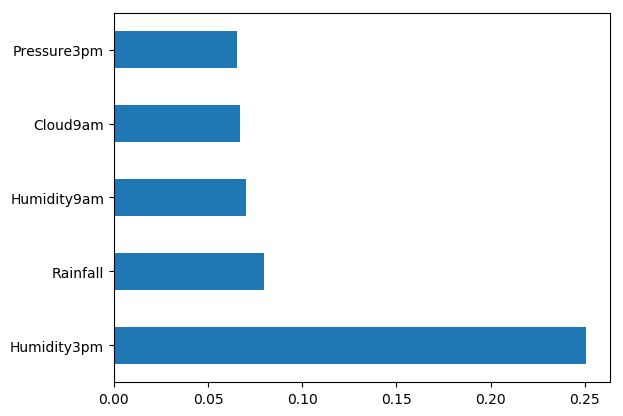

In [110]:
feat_importances = pd.Series(data = clf.feature_importances_,
                             index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Стекинг

In [1]:
from sklearn.ensemble import StackingClassifier

In [2]:
# StackingClassifier(estimators, final_estimator)

In [4]:
import pandas as pd
frog_data = pd.read_csv('./Frogs_MFCCs.csv')
frog_data.head()

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [7]:
frog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [5]:
frog_data['Family'].value_counts()

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

In [8]:
frog_data['Family'] = frog_data['Family'].apply(lambda x: 1 if x == 'Dendrobatidae' else 0)

In [9]:
frog_data['Family'].value_counts()

0    6653
1     542
Name: Family, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [11]:
X = frog_data.drop(labels = ['Family', 'Genus', 'Species', 'RecordID'], axis = 1)

In [12]:
y = frog_data['Family']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf_clf = RandomForestClassifier(n_estimators = 10)

In [21]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [22]:
y_pred = rf_clf.predict(X_test)

In [23]:
f1_score(y_test, y_pred)

0.9711538461538463

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=11)

In [26]:
from sklearn.naive_bayes import GaussianNB

In [28]:
rf_clf = RandomForestClassifier(n_estimators=10, random_state=31)

In [29]:
from sklearn.linear_model import LogisticRegression

In [34]:
estimators = [('rf_clf', rf_clf),
             ('knn', knn),
             ('nb', GaussianNB())]

In [35]:
metamodel = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [37]:
metamodel.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_clf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=31)),
                               ('knn', KNeighborsClassifier(n_neighbors=11)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [39]:
y_pred = metamodel.predict(X_test)

In [40]:
f1_score(y_test, y_pred)

0.9905660377358491

## Бустинг. Практика

In [132]:
import pandas as pd
avia_data = pd.read_csv('AirPass.csv')
avia_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [44]:
avia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [45]:
avia_data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [50]:
avia_data['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [133]:
values = {'Arrival Delay in Minutes': 0}
avia_data.fillna(value=values, inplace=True)

In [52]:
avia_data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [53]:
avia_data['Arrival Delay in Minutes'].describe()

count    103904.000000
mean         15.133392
std          38.649776
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [54]:
avia_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [56]:
avia_data['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [61]:
# Type of Travel = цель перелёта
# satisfaction = удовлетворённость авиакомпанией, целевая переменная

In [76]:
gender_data = avia_data[['id', 'Gender', 'satisfaction']]
gender_data.head()

,id,Gender,satisfaction
0,70172,Male,neutral or dissatisfied
1,5047,Male,neutral or dissatisfied
2,110028,Female,satisfied
3,24026,Female,neutral or dissatisfied
4,119299,Male,satisfied


In [79]:
hue_data = pd.pivot_table(data = gender_data, index=['Gender'], columns=['satisfaction'], values=['id'], aggfunc='count')

In [80]:
hue_data

id          
satisfaction neutral or dissatisfied satisfied
Gender                                        
Female                         30193     22534
Male                           28686     22491

In [81]:
point_data = avia_data[['id', 'Type of Travel', 'satisfaction']]
point_data

,id,Type of Travel,satisfaction
0,70172,Personal Travel,neutral or dissatisfied
1,5047,Business travel,neutral or dissatisfied
2,110028,Business travel,satisfied
3,24026,Business travel,neutral or dissatisfied
4,119299,Business travel,satisfied
...,...,...,...
103899,94171,Business travel,neutral or dissatisfied
103900,73097,Business travel,satisfied
103901,68825,Business travel,neutral or dissatisfied
103902,54173,Business travel,neutral or dissatisfied


In [84]:
hue_data = pd.pivot_table(data = point_data, index=['Type of Travel'], columns=['satisfaction'], values=['id'], aggfunc='count')
hue_data

id          
satisfaction    neutral or dissatisfied satisfied
Type of Travel                                   
Business travel                   29909     41746
Personal Travel                   28970      3279

In [109]:
# Class = туристический класс пассажира
class_data = avia_data[['id', 'Class', 'satisfaction']]
class_data

,id,Class,satisfaction
0,70172,Eco Plus,neutral or dissatisfied
1,5047,Business,neutral or dissatisfied
2,110028,Business,satisfied
3,24026,Business,neutral or dissatisfied
4,119299,Business,satisfied
...,...,...,...
103899,94171,Eco,neutral or dissatisfied
103900,73097,Business,satisfied
103901,68825,Business,neutral or dissatisfied
103902,54173,Eco,neutral or dissatisfied


In [110]:
hue_data = pd.pivot_table(data = class_data, index=['Class'], columns=['satisfaction'], aggfunc='count')
hue_data

id          
satisfaction neutral or dissatisfied satisfied
Class                                         
Business                       15185     34480
Eco                            38044      8701
Eco Plus                        5650      1844

In [120]:
class_data.groupby(by='satisfaction')['Class'].value_counts()

satisfaction             Class   
neutral or dissatisfied  Eco         38044
                         Business    15185
                         Eco Plus     5650
satisfied                Business    34480
                         Eco          8701
                         Eco Plus     1844
Name: Class, dtype: int64

In [119]:
group_data = class_data.groupby(by='Class')['satisfaction'].value_counts(normalize=True) 
group_data

Class     satisfaction           
Business  satisfied                  0.694251
          neutral or dissatisfied    0.305749
Eco       neutral or dissatisfied    0.813862
          satisfied                  0.186138
Eco Plus  neutral or dissatisfied    0.753936
          satisfied                  0.246064
Name: satisfaction, dtype: float64

In [105]:
group_data = class_data.groupby(by='Class')['satisfaction'].count() 
group_data

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: satisfaction, dtype: int64

In [106]:
group_data.loc['Business']

49665

In [90]:
hue_data.columns

MultiIndex([('id', 'neutral or dissatisfied'),
            ('id',               'satisfied')],
           names=[None, 'satisfaction'])

In [97]:
hue_data.columns = ['neutral or dissatisfied', 'satisfied']

In [99]:
hue_data.index

Index(['Business', 'Eco', 'Eco Plus'], dtype='object', name='Class')

In [111]:
hue_data

id          
satisfaction neutral or dissatisfied satisfied
Class                                         
Business                       15185     34480
Eco                            38044      8701
Eco Plus                        5650      1844

In [112]:
hue_data.columns = ['neutral or dissatisfied', 'satisfied']
hue_data

,neutral or dissatisfied,satisfied
Class,,
Business,15185,34480
Eco,38044,8701
Eco Plus,5650,1844


In [113]:
import matplotlib.pyplot as plt

In [117]:
class_data = avia_data[['id', 'Class', 'satisfaction']]
class_data

,id,Class,satisfaction
0,70172,Eco Plus,neutral or dissatisfied
1,5047,Business,neutral or dissatisfied
2,110028,Business,satisfied
3,24026,Business,neutral or dissatisfied
4,119299,Business,satisfied
...,...,...,...
103899,94171,Eco,neutral or dissatisfied
103900,73097,Business,satisfied
103901,68825,Business,neutral or dissatisfied
103902,54173,Eco,neutral or dissatisfied


In [134]:
avia_data['satisfaction'] = avia_data['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
avia_data['Customer Type'] = avia_data['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
avia_data['Type of Travel'] = avia_data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
avia_data['Gender'] = avia_data['Gender'].map({'Male': 0, 'Female': 1})

In [122]:
avia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int64  
 3   Customer Type                      103904 non-null  int64  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  int64  
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [135]:
avia_data = pd.get_dummies(avia_data, columns=['Class'])

In [124]:
avia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int64  
 3   Customer Type                      103904 non-null  int64  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  int64  
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [136]:
from sklearn.model_selection import train_test_split
X = avia_data.drop(labels='satisfaction', axis=1)
y = avia_data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [137]:
X_test.shape

(20781, 26)

In [138]:
from sklearn import preprocessing
st_scaler = preprocessing.StandardScaler()
st_scaler.fit(X_train)
X_train = st_scaler.transform(X_train)
X_test = st_scaler.transform(X_test)
X_test[0][0]

1.193295224074621

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.8550407188991856